# imports 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import wrangle 

from wordcloud import WordCloud

# Wrangle
- Load the README data set.

In [2]:
df = wrangle.get_search_csv()
df = wrangle.prep_text(df)


Removed 201 stopwords
---

Removed 49 stopwords
---

Removed 2 stopwords
---

Removed 218 stopwords
---

Removed 401 stopwords
---

Removed 0 stopwords
---

Removed 50 stopwords
---

Removed 8 stopwords
---

Removed 158 stopwords
---

Removed 21 stopwords
---

Removed 44 stopwords
---

Removed 110 stopwords
---

Removed 500 stopwords
---

Removed 494 stopwords
---

Removed 31 stopwords
---

Removed 427 stopwords
---

Removed 76 stopwords
---

Removed 1 stopwords
---

Removed 175 stopwords
---

Removed 731 stopwords
---

Removed 68 stopwords
---

Removed 58 stopwords
---

Removed 358 stopwords
---

Removed 52 stopwords
---

Removed 15 stopwords
---

Removed 48 stopwords
---

Removed 100 stopwords
---

Removed 116 stopwords
---

Removed 0 stopwords
---

Removed 134 stopwords
---

Removed 320 stopwords
---

Removed 27 stopwords
---

Removed 74 stopwords
---

Removed 88 stopwords
---

Removed 8 stopwords
---

Removed 272 stopwords
---

Removed 123 stopwords
---

Removed 389 stopwords
---


# Explore
* created function to *flatten* the languages into less categories
    - went from 21 categories down to 6

In [3]:
language_freq = df.language.value_counts()
    
#quick takeaway --> lets combine those with 3 or less into other
#we can then backport the code to the wrangle portion
language_freq.size

21

In [4]:
def flatten_languages(language):

    keepers = ['Python', 'R', 'JavaScript', 'Jupyter Notebook', 'HTML']
    
    if language not in keepers:
        language = 'Other'

    return language

In [5]:
df.language = df.language.apply(flatten_languages)

In [6]:
df.language.value_counts()

Python              31
Other               24
R                   13
JavaScript          12
Jupyter Notebook    11
HTML                 7
Name: language, dtype: int64

## Univariate
- histogram of langauges, 
- value counts of words by langauge ?

<AxesSubplot:>

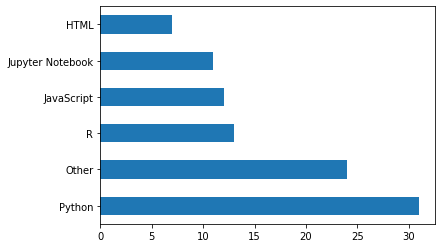

In [7]:
df.language.value_counts().plot.barh()

Create and explore bigrams for the README data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 108
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   repo        98 non-null     object
 1   language    98 non-null     object
 2   readme_txt  98 non-null     object
 3   clean       98 non-null     object
 4   stemmed     98 non-null     object
 5   lemmatized  98 non-null     object
dtypes: object(6)
memory usage: 5.4+ KB


In [9]:
#created class in order to facilitate bigram and trigram creation
class code_language:
  def __init__(self, words, label:str):
    self.words = words
    self.label = label
    
  def bigrams(self):
    return pd.Series(list(nltk.bigrams(self.words.split())))

  def trigrams(self):
    return pd.Series(list(nltk.ngrams(self.words.split(), 3)))


In [10]:
html = code_language(words=' '.join(df[df.language == 'HTML'].lemmatized), label='html')
jupyter = code_language(words=' '.join(df[df.language == 'Jupyter Notebook'].lemmatized), label='jupyter')
javascript = code_language(words=' '.join(df[df.language == 'JavaScript'].lemmatized), label='javascript')
r_ = code_language(words=' '.join(df[df.language == 'R'].lemmatized), label='r')
other_ = code_language(words=' '.join(df[df.language == 'Other'].lemmatized), label='other')
python_ = code_language(words=' '.join(df[df.language == 'Python'].lemmatized), label='python')


In [11]:
languages = [html, jupyter, javascript, r_, other_, python_]

In [12]:
#this will join all the entire text column for entries labled ham
# runs them through  function
# html_words = ' '.join(df[df.language == 'HTML'].lemmatized)
# jupyter_words = ' '.join(df[df.language == 'Jupyter Notebook'].lemmatized)
# javascript_words =  ' '.join(df[df.language == 'JavaScript'].lemmatized)
# r_words =  ' '.join(df[df.language == 'R'].lemmatized)
# other_words =  ' '.join(df[df.language == 'Other'].lemmatized)
# python_words =  ' '.join(df[df.language == 'Python'].lemmatized)
# html_bigrams = pd.Series(list(nltk.bigrams(html_words)))
# jupyter_bigrams = pd.Series(list(nltk.bigrams(jupyter_words)))
# javascript_bigrams = pd.Series(list(nltk.bigrams(javascript_words)))
# r_bigrams = pd.Series(list(nltk.bigrams(r_words)))
# other_bigrams = pd.Series(list(nltk.bigrams(other_words)))
# python_bigrams = pd.Series(list(nltk.bigrams(python_words)))
# html_trigrams = pd.Series(list(nltk.ngrams(html_words.split(), 3)))
# jupyter_trigrams = pd.Series(list(nltk.ngrams(jupyter_words.split(), 3)))
# javascript_trigrams = pd.Series(list(nltk.ngrams(javascript_words.split(), 3)))
# r_trigrams = pd.Series(list(nltk.ngrams(r_words.split(), 3)))
# other_trigrams = pd.Series(list(nltk.ngrams(other_words.split(), 3)))
# python_trigrams = pd.Series(list(nltk.ngrams(python_words.split(), 3)))

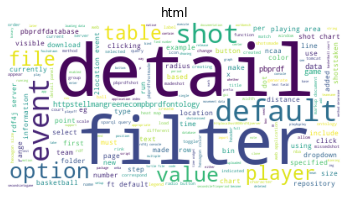

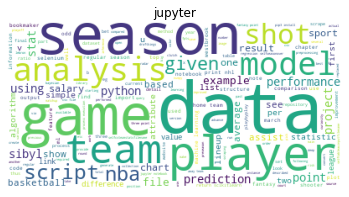

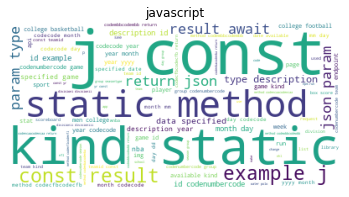

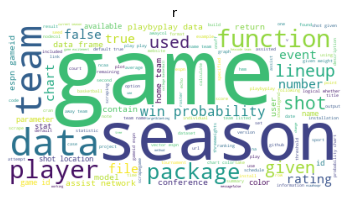

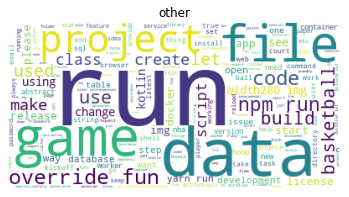

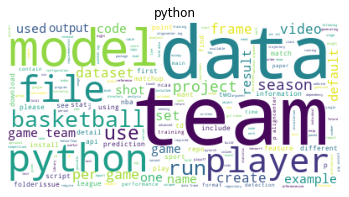

In [13]:
for language in languages:
    
    img = WordCloud(background_color='white')\
        .generate(language.words)

    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label)
    plt.show()

    lan.value_counts().head(20).plot.barh()

 Visualize them with a word cloud. How do they compare with the ham bigrams?


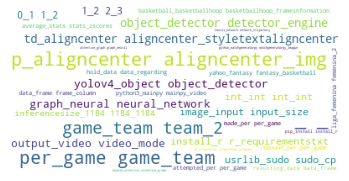

In [94]:

for language in languages:
    img = WordCloud(background_color='white', collocation_threshold=3, collocations=True)\
        .generate(' '.join(language.bigrams().apply('_'.join)))\
        #.generate(' ' .join(pd.Series(list(ham_words))))

    plt.imshow(img)
    plt.axis('off')

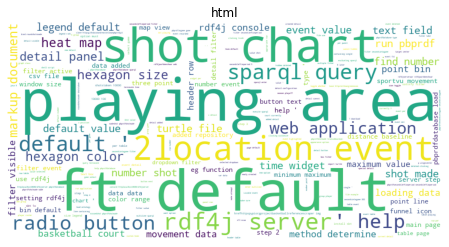

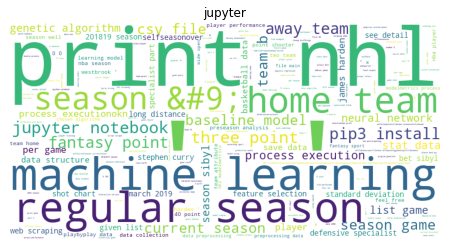

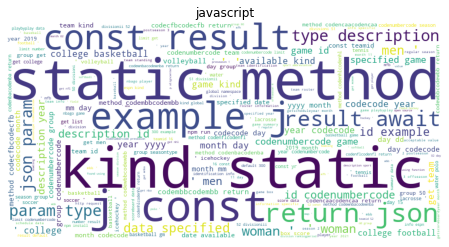

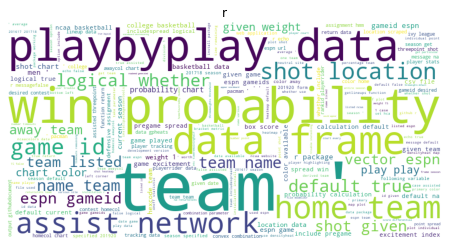

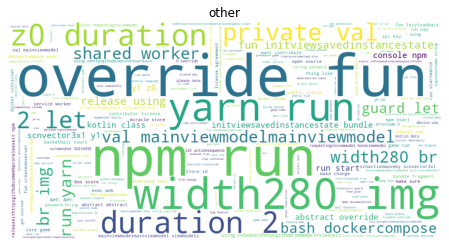

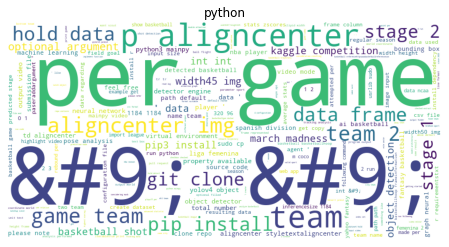

In [14]:
for language in languages:
    data = {' '.join(k): v for k, v in language.bigrams()
                                        .value_counts()
                                        .to_dict()
                                        .items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label)
    plt.show()

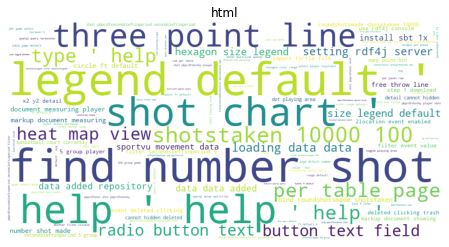

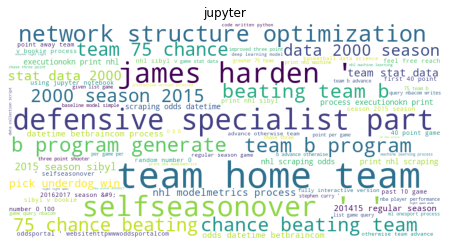

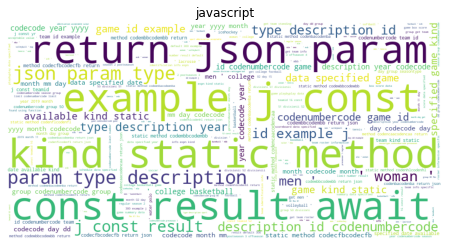

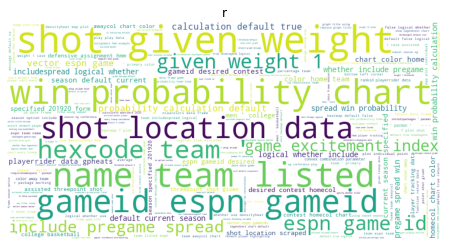

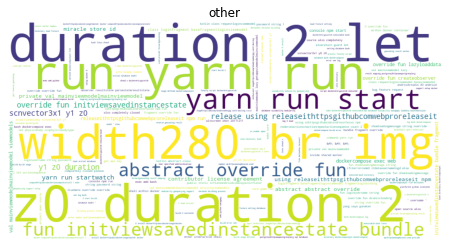

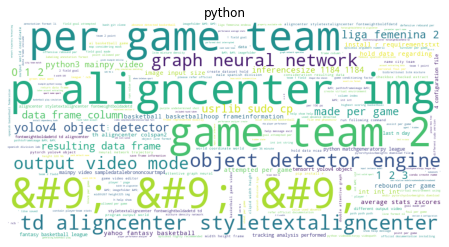

In [15]:
for language in languages:
    data = {' '.join(k): v for k, v in language.trigrams()
                                        .value_counts()
                                        .to_dict()
                                        .items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label)
    plt.show()

In [8]:
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}


In [23]:
tester = {' '.join(k): v for k, v in ham_bigrams.to_dict().items()}

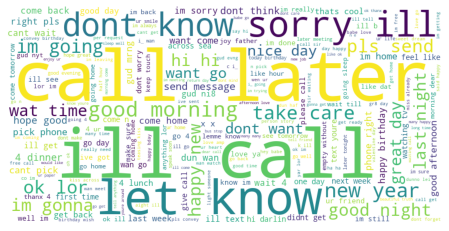

In [7]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

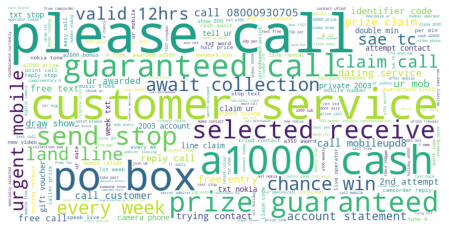

In [34]:
data = {' '.join(k): v for k, v in spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

Is there any overlap in the bigrams for the spam data and the ham data?


Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.


<AxesSubplot:>

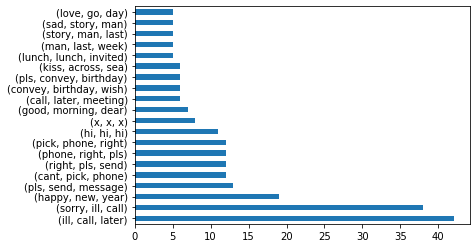

In [39]:
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words, 3)))
ham_trigrams.value_counts().head(20).plot.barh()

<AxesSubplot:>

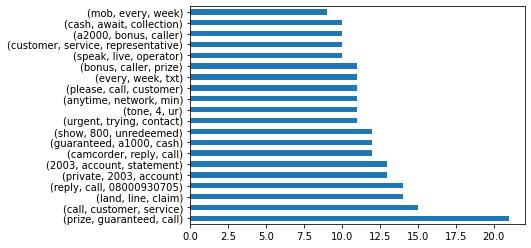

In [38]:
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words, 3)))
spam_trigrams.value_counts().head(20).plot.barh()

In [48]:
ham_bigrams.to_dict()

{('call', 'later'): 52,
 ('ill', 'call'): 48,
 ('let', 'know'): 42,
 ('sorry', 'ill'): 39,
 ('dont', 'know'): 32,
 ('good', 'morning'): 31,
 ('new', 'year'): 30,
 ('take', 'care'): 26,
 ('im', 'going'): 24,
 ('ok', 'lor'): 22,
 ('pls', 'send'): 22,
 ('im', 'gonna'): 20,
 ('good', 'night'): 19,
 ('happy', 'new'): 19,
 ('wat', 'time'): 18,
 ('last', 'night'): 18,
 ('hi', 'hi'): 18,
 ('great', 'day'): 17,
 ('dont', 'want'): 15,
 ('want', 'go'): 15,
 ('nice', 'day'): 15,
 ('send', 'message'): 15,
 ('dont', 'think'): 14,
 ('hope', 'good'): 14,
 ('4', 'dinner'): 14,
 ('pick', 'phone'): 13,
 ('want', 'come'): 13,
 ('im', 'home'): 13,
 ('cant', 'pick'): 13,
 ('good', 'afternoon'): 13,
 ('come', 'back'): 12,
 ('wait', '4'): 12,
 ('dun', 'wan'): 12,
 ('happy', 'birthday'): 12,
 ('come', 'home'): 12,
 ('phone', 'right'): 12,
 ('right', 'pls'): 12,
 ('gud', 'mrng'): 12,
 ('im', 'sorry'): 12,
 ('cant', 'wait'): 12,
 ('x', 'x'): 11,
 ('thats', 'cool'): 11,
 ('get', 'back'): 11,
 ('4', 'lunch'): 11,


# Explore the blog articles using the techniques discussed in the exploration lesson.



In [98]:
from importlib import reload
reload(acquire)

<module 'acquire' from '/Users/sinao/codeup-data-science/natural-language-processing-exercises/acquire.py'>

In [58]:
#wrangle
codeup_df = acquire.get_blog_content()
codeup_df = prepare.prep_text(codeup_df)

In [66]:
codeup_words = ' '.join(codeup_df.lemmatized)

(-0.5, 399.5, 199.5, -0.5)

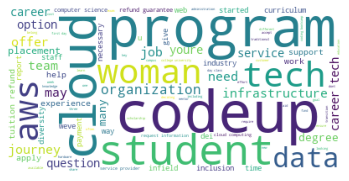

In [70]:
img = WordCloud(background_color='white')\
    .generate(codeup_words)

plt.imshow(img)
plt.axis('off')

In [92]:
codeup_bigrams = pd.Series(list(nltk.bigrams(codeup_words.split())))
codeup_trigrams = pd.Series(list(nltk.ngrams(codeup_words.split(), 3)))

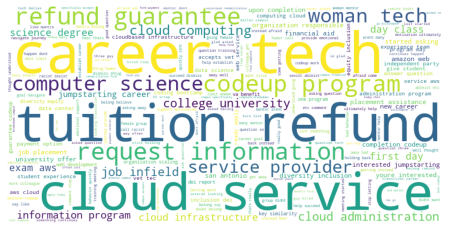

In [91]:
data = {' '.join(k): v for k, v in codeup_bigrams
                                    .value_counts()
                                    .to_dict()
                                    .items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

<AxesSubplot:>

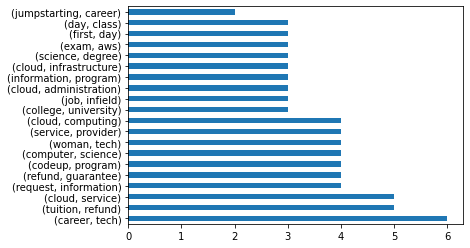

In [94]:
codeup_bigrams.value_counts().head(20).plot.barh()

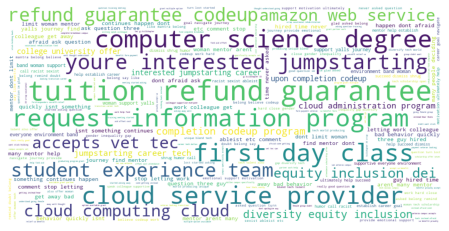

In [93]:
data = {' '.join(k): v for k, v in codeup_trigrams
                                    .value_counts()
                                    .to_dict()
                                    .items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

<AxesSubplot:>

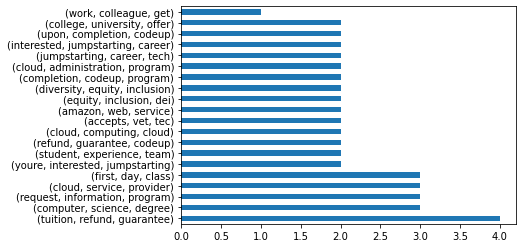

In [95]:
codeup_trigrams.value_counts().head(20).plot.barh()

In [82]:
#trying to see if i can get bigrams for each article seperately
codeup_df['bigrams']= codeup_df.lemmatized.apply(nltk.bigrams)

# Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

/Users/sinao/codeup-data-science/natural-language-processing-exercises/acquire.py:81: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 81 of the file /Users/sinao/codeup-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = soupify(get(url).content)


Removed 23 stopwords
---
Removed 27 stopwords
---
Removed 14 stopwords
---
Removed 21 stopwords
---
Removed 27 stopwords
---
Removed 23 stopwords
---
Removed 18 stopwords
---
Removed 22 stopwords
---
Removed 21 stopwords
---
Removed 22 stopwords
---
Removed 17 stopwords
---
Removed 24 stopwords
---
Removed 20 stopwords
---
Removed 20 stopwords
---
Removed 23 stopwords
---
Removed 20 stopwords
---
Removed 21 stopwords
---
Removed 23 stopwords
---
Removed 23 stopwords
---
Removed 20 stopwords
---
Removed 24 stopwords
---
Removed 23 stopwords
---
Removed 24 stopwords
---
Removed 22 stopwords
---
Removed 21 stopwords
---
Removed 23 stopwords
---
Removed 20 stopwords
---
Removed 17 stopwords
---
Removed 22 stopwords
---
Removed 17 stopwords
---
Removed 24 stopwords
---
Removed 34 stopwords
---
Removed 26 stopwords
---
Removed 23 stopwords
---
Removed 19 stopwords
---
Removed 20 stopwords
---
Removed 28 stopwords
---
Removed 30 stopwords
---
Removed 26 stopwords
---
Removed 24 stopwords
---


(-0.5, 399.5, 199.5, -0.5)

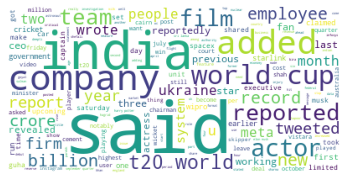

In [100]:
#wrangle
news_df = acquire.get_news_articles(fresh=True)
news_df = prepare.prep_text(news_df)
news_words = ' '.join(news_df.lemmatized)
img = WordCloud(background_color='white')\
    .generate(news_words)

plt.imshow(img)
plt.axis('off')

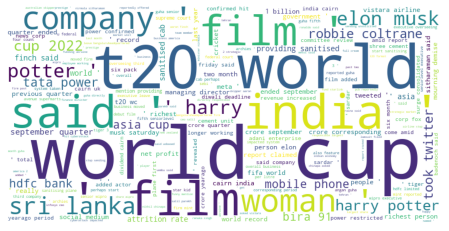

<AxesSubplot:>

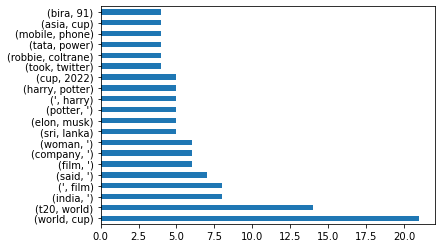

In [101]:
news_bigrams = pd.Series(list(nltk.bigrams(news_words.split())))

data = {' '.join(k): v for k, v in news_bigrams
                                    .value_counts()
                                    .to_dict()
                                    .items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

news_bigrams.value_counts().head(20).plot.barh()

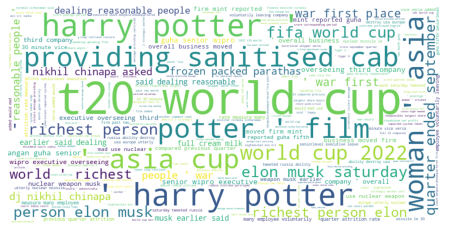

<AxesSubplot:>

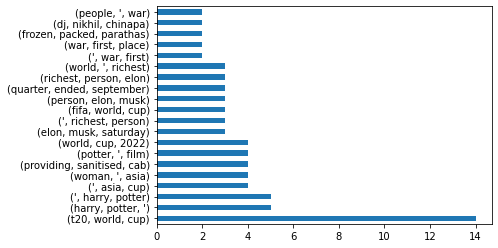

In [104]:
news_trigrams = pd.Series(list(nltk.ngrams(news_words.split(), 3)))
data = {' '.join(k): v for k, v in news_trigrams
                                    .value_counts()
                                    .to_dict()
                                    .items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()
news_trigrams.value_counts().head(20).plot.barh()